# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = 'metric'
    city_url = f'{url}q={city}&appid={weather_api_key}&units={units}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | lihue
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | vorgashor
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | vallenar
Processing Record 10 of Set 1 | atar
Processing Record 11 of Set 1 | dudinka
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | taulaga
Processing Record 14 of Set 1 | el calafate
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | tolanaro
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | mount isa
Processing Record 19 of Set 1 | gueugnon
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | nadym
Processing Record 22 of Set 1 | georgetown
Processing Record 23 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hamilton,39.1834,-84.5333,8.43,95,100,3.60,US,1704815850
1,ancud,-41.8697,-73.8203,14.64,65,34,3.56,CL,1704816099
2,port alfred,-33.5906,26.8910,23.43,85,83,1.79,ZA,1704816099
3,lihue,21.9789,-159.3672,21.06,80,1,5.51,US,1704816100
4,hermanus,-34.4187,19.2345,20.66,76,100,8.52,ZA,1704816100


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,8.43,95,100,3.60,US,1704815850
1,ancud,-41.8697,-73.8203,14.64,65,34,3.56,CL,1704816099
2,port alfred,-33.5906,26.8910,23.43,85,83,1.79,ZA,1704816099
3,lihue,21.9789,-159.3672,21.06,80,1,5.51,US,1704816100
4,hermanus,-34.4187,19.2345,20.66,76,100,8.52,ZA,1704816100


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

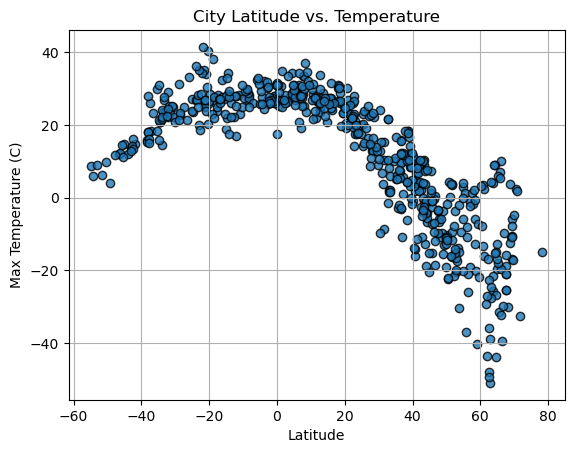

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=.8, edgecolors='k')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude vs. Temperature')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

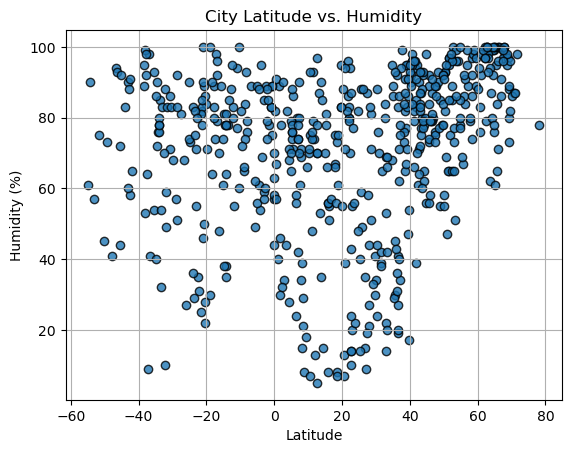

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=.8, edgecolors='k')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

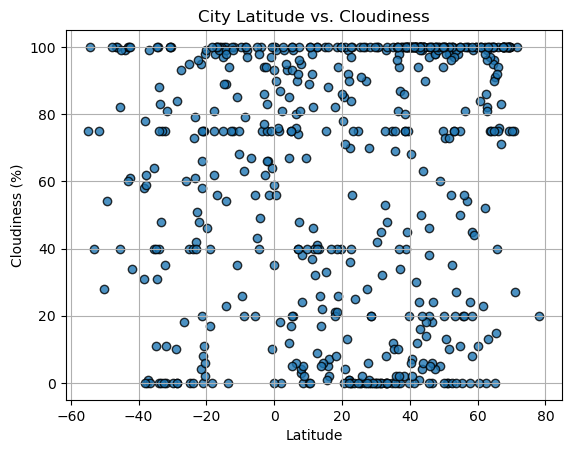

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=.8, edgecolors='k')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

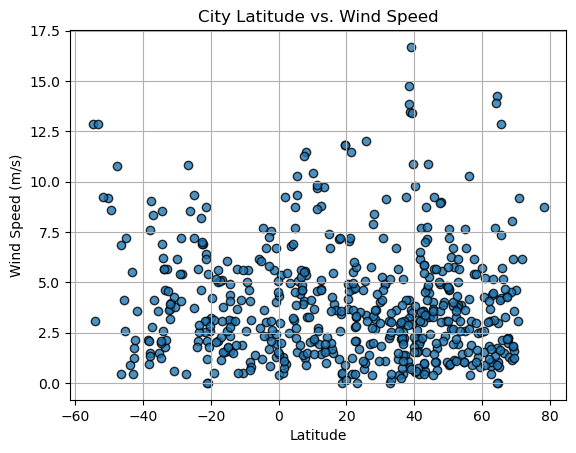

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=.8, edgecolors='k')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# x_values = northern_hemi_df['Lat']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df['Lat']) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,omdurman,15.6445,32.4777,19.74,22,11,6.06,SD,1704410101
2,tai'an,36.1853,117.1200,1.25,50,11,2.08,CN,1704410242
5,wailua homesteads,22.0669,-159.3780,26.24,76,0,4.12,US,1704410243
10,hadibu,12.6500,54.0333,24.03,61,99,4.84,YE,1704410244
14,jamestown,42.0970,-79.2353,-2.23,80,100,3.09,US,1704410246


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df['Lat']) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,21.72,94,20,6.17,ZA,1704410241
3,grytviken,-54.2811,-36.5092,6.37,82,93,4.24,GS,1704410242
4,hermanus,-34.4187,19.2345,19.54,85,40,4.36,ZA,1704410242
6,puerto natales,-51.7236,-72.4875,12.67,82,100,1.40,CL,1704410193
7,port lincoln,-34.7333,135.8667,19.69,74,66,7.18,AU,1704410243


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.858466265617104


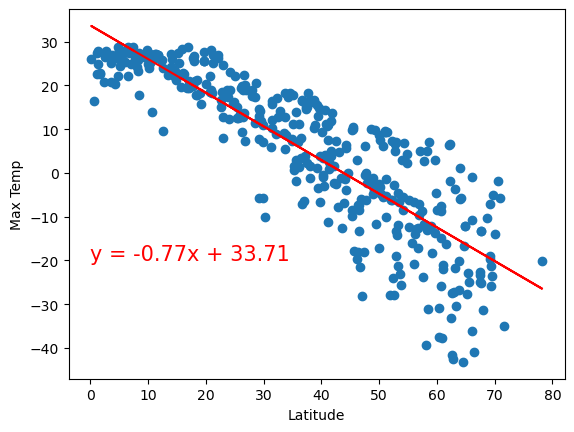

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(0,-20), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r-value is {rvalue}')



The r-value is 0.5623211535333663


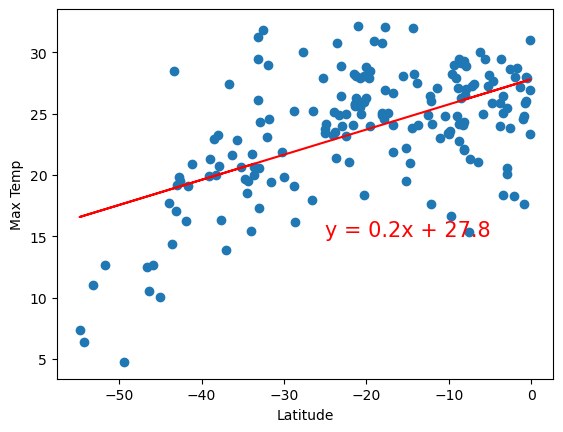

In [ ]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(-25,15), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** In this analysis, we are tracking the correlation of the latitude of a country and its temperature. Our linear regression line shows that there is indead a strong correlation between these two factors, especially for the northern hemisphere which has a very strong r-value of ~ -0.86

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.3793755184853498


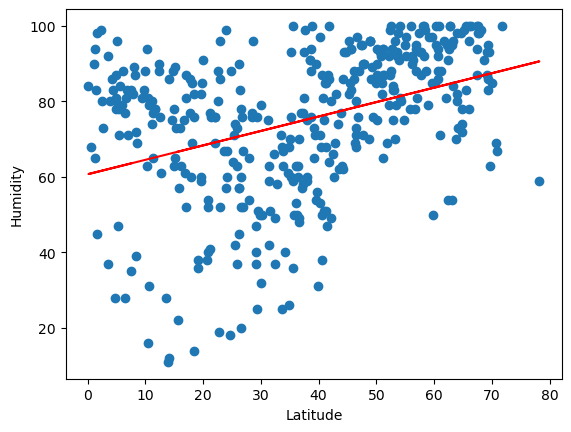

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(0,-20), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is {rvalue}')

The r-value is 0.3046787305823262


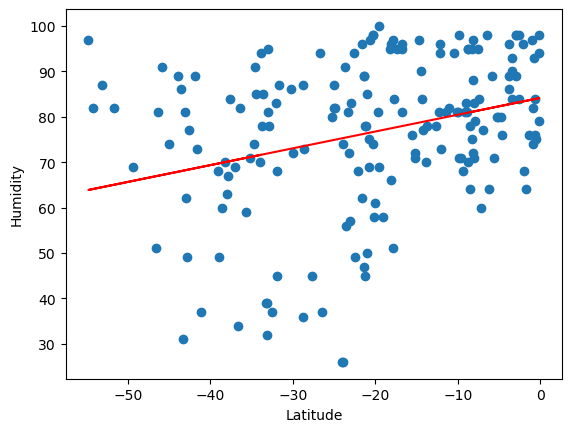

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(-25,15), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** The correlation between latitude and humidity is weaker than our  prior analysis. However, we can see that there is still a linear correlation between humidity and latitude, allthough it is fairly weak.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.2684186210274607


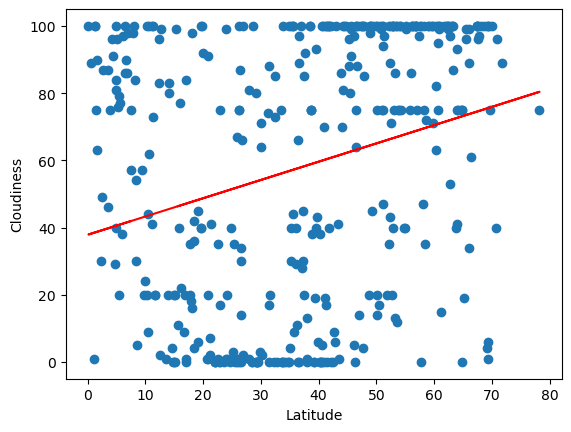

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(-25,15), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-value is {rvalue}')

The r-value is 0.19642002612952109


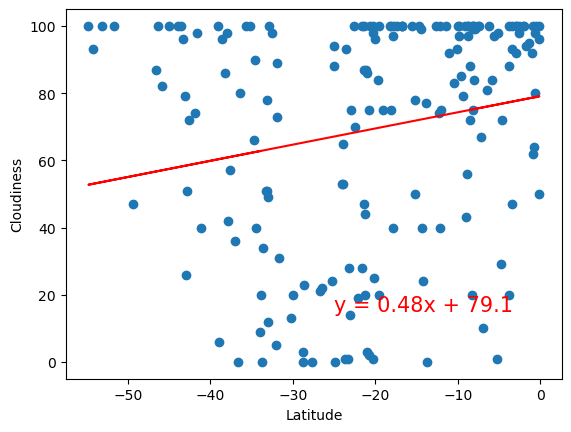

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(-25,15), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** For our cloudiness vs latitude analysis, our northern and southern hemisphere data sets returned a r-value of less that 0.3. This shows us that there is not a strong connetion between the latitude of a country and how cloudy it tends to be.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.15811523610487202


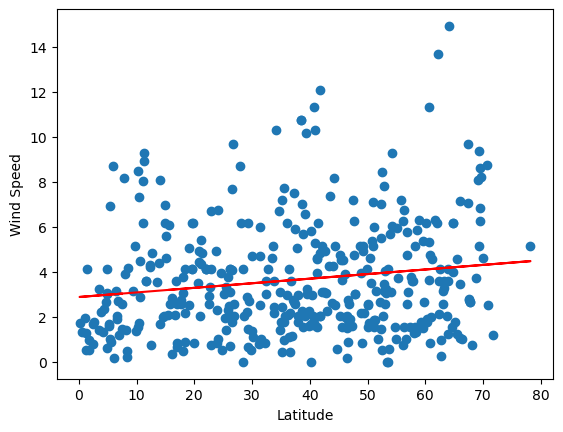

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(0,-20), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-value is {rvalue}')

The r-value is -0.35252735607312674


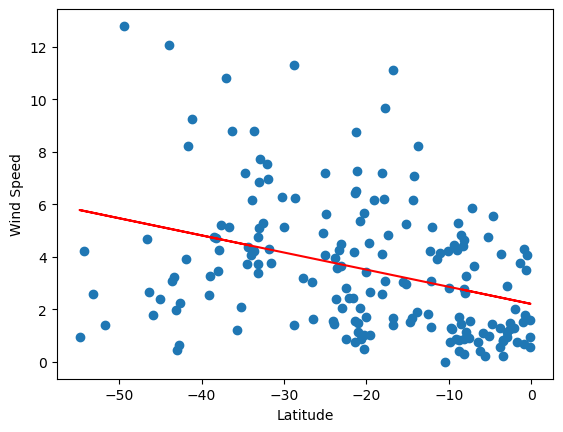

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(-25,15), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** The latitude of a country does not appear to have a linear relationship with the wind speed of that country. The southern hemisphere countries in our analysis have a stronger r-value than the northern hemisphere countries, but with an r-value of ~ -0.35 the correlation is still weak.